<a href="https://colab.research.google.com/github/JOSHITHA6/STEEL_PLANT_blast_furnance/blob/main/RINL_blast_furnance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING ALL LIBRARIES**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data=pd.read_csv('/content/bf3_data_2022.csv')

In [ ]:
data.drop(columns=['SKIN_TEMP_AVG'])

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP1,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,112.0,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,120.0,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,123.0,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,119.0,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,125.0,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,31-12-21 23:10,278198.0,2.75,76.0,2.0,189.0,2.92,2.79,2628.0,22.25,...,100.0,116.0,108.0,122.0,0.2,111.0,1.0,21.90,20.25,3.10
25401,31-12-21 23:20,286486.0,2.80,77.0,1.0,190.0,2.97,2.84,2590.0,22.22,...,103.0,113.0,105.0,119.0,0.2,110.0,1.0,22.09,20.14,3.04
25402,31-12-21 23:30,284500.0,2.81,77.0,0.0,191.0,2.98,2.85,2592.0,22.20,...,101.0,116.0,108.0,115.0,0.1,110.0,1.0,22.04,20.20,2.99
25403,31-12-21 23:40,284455.0,2.83,77.0,1.0,190.0,3.00,2.87,2582.0,22.21,...,108.0,119.0,113.0,121.0,0.2,115.0,1.0,22.03,20.27,3.09


In [ ]:
data['DATE_TIME']=pd.to_datetime(data['DATE_TIME'])

<ipython-input-39-7e602554d981>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE_TIME']=pd.to_datetime(data['DATE_TIME'])


**Formatting date time into millisec format using format fun**

In [ ]:


# Define the correct date-time format (adjust this based on your actual date-time format in the Excel file)
date_format = '%Y-%m-%d %H:%M:%S.%f'  # Example format

# Use pd.to_datetime to parse the DATE_TIME column with the specified format
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], format=date_format, errors='coerce')

# Display the first few rows of the dataframe to confirm changes
print(data.head())


            DATE_TIME   CB_FLOW  CB_PRESS  CB_TEMP  STEAM_FLOW  STEAM_TEMP  \
0 2021-01-07 00:10:00  311727.0      3.15    129.0         4.0       213.0   
1 2021-01-07 00:20:00  315163.0      3.16    129.0         4.0       209.0   
2 2021-01-07 00:30:00  314595.0      3.16    128.0         4.0       205.0   
3 2021-01-07 00:40:00  312465.0      3.16    127.0         4.0       200.0   
4 2021-01-07 00:50:00  302981.0      3.11    126.0         4.0       194.0   

   STEAM_PRESS  O2_PRESS  O2_FLOW  O2_PER  ...  TOP_TEMP2  TOP_TEMP3  \
0         3.34      3.20   7296.0   23.08  ...      135.0      107.0   
1         3.35      3.20   7829.0   23.08  ...      143.0      109.0   
2         3.35      3.21   7904.0   23.08  ...      138.0      110.0   
3         3.35      3.21   7919.0   23.08  ...      128.0      102.0   
4         3.29      3.16   7938.0   23.08  ...      139.0      112.0   

   TOP_TEMP4  TOP_SPRAY  TOP_TEMP  TOP_PRESS_1     CO    CO2    H2  \
0      130.0        0.0     

**Alternative to format function(without using format)**

In [ ]:

# Use pd.to_datetime to parse the DATE_TIME column without specifying format
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], errors='coerce')

# Display the first few rows of the dataframe to confirm changes
print(data.head())


            DATE_TIME   CB_FLOW  CB_PRESS  CB_TEMP  STEAM_FLOW  STEAM_TEMP  \
0 2021-01-07 00:10:00  311727.0      3.15    129.0         4.0       213.0   
1 2021-01-07 00:20:00  315163.0      3.16    129.0         4.0       209.0   
2 2021-01-07 00:30:00  314595.0      3.16    128.0         4.0       205.0   
3 2021-01-07 00:40:00  312465.0      3.16    127.0         4.0       200.0   
4 2021-01-07 00:50:00  302981.0      3.11    126.0         4.0       194.0   

   STEAM_PRESS  O2_PRESS  O2_FLOW  O2_PER  ...  TOP_TEMP2  TOP_TEMP3  \
0         3.34      3.20   7296.0   23.08  ...      135.0      107.0   
1         3.35      3.20   7829.0   23.08  ...      143.0      109.0   
2         3.35      3.21   7904.0   23.08  ...      138.0      110.0   
3         3.35      3.21   7919.0   23.08  ...      128.0      102.0   
4         3.29      3.16   7938.0   23.08  ...      139.0      112.0   

   TOP_TEMP4  TOP_SPRAY  TOP_TEMP  TOP_PRESS_1     CO    CO2    H2  \
0      130.0        0.0     

In [ ]:
data.dropna(inplace=True)

**REGRESSION USING RANDOM_FOREST**

In [ ]:
# def train_and_predict(X,y,shift_hours):
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#   # Initialize the Random Forest classifier
#   rf = RandomForestRegressor(n_estimators=100, random_state=42)
#   # Train the model on the training data
#   rf.fit(X_train, y_train)
#   # Predict the labels for the test set
#   y_pred = rf.predict(X_test)
#   # Evaluate the model's performance
#   accuracy = accuracy_score(y_test, y_pred)
#   mse = mean_squared_error(y_test, rf.predict(X_test))
#   print(f"Shift {shift_hours} hours - Mean Squared Error: {mse}")
#   mae = mean_absolute_error(y_test, rf.predict(X_test))
#   print(f"Shift {shift_hours} hours - Mean Absolute Error: {mae}")
#   r2 = r2_score(y_test, rf.predict(X_test))
#   print(f"Shift {shift_hours} hours - R-squared: {r2}")
#   return rf, pd.DataFrame(y_pred, columns=X.columns)


In [ ]:
def train_and_predict(X, y, shift_hours):
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, train_size=0.95, random_state=42)

  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)
  predictions = model.predict(X)
  predicted_df = pd.DataFrame(predictions, columns=X.columns)
  predicted_df['DATE_TIME'] = X.index + pd.to_timedelta(shift_hours, unit='h')
  mse = mean_squared_error(y_test, model.predict(X_test))
  mae = mean_absolute_error(y_test, model.predict(X_test))
  r2 = r2_score(y_test, model.predict(X_test))
  print(f"Shift {shift_hours} hours - Mean Squared Error: {mse}")
  print(f"Shift {shift_hours} hours - Mean Absolute Error: {mae}")
  print(f"Shift {shift_hours} hours - R-squared: {r2}")
  return model, predicted_df


In [ ]:
X = data.drop(columns=['DATE_TIME'])
X.index = data['DATE_TIME']
y = X.copy()
    #print(X)
    #print(y)


# Proceed with your data processing and analysis

    # result = train_and_predict(X, y, shift_hours=1)
    # print(result)

    # model_shift_1, predicted_df_shift_1 = result
    # predicted_df_shift_1['CO_CO2_ratio'] = predicted_df_shift_1['CO'] /predicted_df_shift_1['CO2']

    # predicted_df_shift_1.to_csv('predicted_data_after_1_hour.csv', index=False)
    # print(predicted_df_shift_1)

    # X_shift_2 = predicted_df_shift_1.drop(columns=['DATE_TIME'])
    # X_shift_2.index = predicted_df_shift_1['DATE_TIME']
    # model_shift_2, predicted_df_shift_2 = train_and_predict(X_shift_2, X_shift_2, shift_hours=1)
    # predicted_df_shift_2['CO_CO2_ratio'] = predicted_df_shift_2['CO'] /predicted_df_shift_2['CO2']

    # predicted_df_shift_2.to_csv('predicted_data_after_2_hours.csv', index=False)
    # print(predicted_df_shift_2)

    # X_shift_3 = predicted_df_shift_2.drop(columns=['DATE_TIME'])
    # X_shift_3.index = predicted_df_shift_2['DATE_TIME']

    # model_shift_3, predicted_df_shift_3 = train_and_predict(X_shift_3, X_shift_3, shift_hours=1)
    # predicted_df_shift_3['CO_CO2_ratio'] = predicted_df_shift_3['CO'] /predicted_df_shift_3['CO2']

    # predicted_df_shift_3.to_csv('predicted_data_after_3_hours.csv', index=False)
    # predicted_df_shift_3

    # X_shift_4 = predicted_df_shift_3.drop(columns=['DATE_TIME'])
    # X_shift_4.index = predicted_df_shift_3['DATE_TIME']
    # model_shift_4, predicted_df_shift_4 = train_and_predict(X_shift_4, X_shift_4, shift_hours=1)
    # predicted_df_shift_4['CO_CO2_ratio'] = predicted_df_shift_4['CO'] /predicted_df_shift_4['CO2']

    # predicted_df_shift_4.to_csv('predicted_data_after_4_hours.csv', index=False)
    # predicted_df_shift_4


In [ ]:
model_shift_1, predicted_df_shift_1 = train_and_predict(X, y, shift_hours=1)
predicted_df_shift_1['CO_CO2_ratio'] = predicted_df_shift_1['CO'] /predicted_df_shift_1['CO2']
predicted_df_shift_1.to_csv('predicted_data_after_1_hour.csv', index=False)
print(predicted_df_shift_1)

X_shift_2 = predicted_df_shift_1.drop(columns=['DATE_TIME'])
X_shift_2.index = predicted_df_shift_1['DATE_TIME']
model_shift_2, predicted_df_shift_2 = train_and_predict(X_shift_2, X_shift_2, shift_hours=1)
predicted_df_shift_2['CO_CO2_ratio'] = predicted_df_shift_2['CO'] /predicted_df_shift_2['CO2']
predicted_df_shift_2.to_csv('predicted_data_after_2_hours.csv', index=False)
print(predicted_df_shift_2)

X_shift_3 = predicted_df_shift_2.drop(columns=['DATE_TIME'])
X_shift_3.index = predicted_df_shift_2['DATE_TIME']

model_shift_3, predicted_df_shift_3 = train_and_predict(X_shift_3, X_shift_3, shift_hours=1)
predicted_df_shift_3['CO_CO2_ratio'] = predicted_df_shift_3['CO'] /predicted_df_shift_3['CO2']
predicted_df_shift_3.to_csv('predicted_data_after_3_hours.csv', index=False)
predicted_df_shift_3

X_shift_4 = predicted_df_shift_3.drop(columns=['DATE_TIME'])
X_shift_4.index = predicted_df_shift_3['DATE_TIME']
model_shift_4, predicted_df_shift_4 = train_and_predict(X_shift_4, X_shift_4, shift_hours=1)
predicted_df_shift_4['CO_CO2_ratio'] = predicted_df_shift_4['CO'] /predicted_df_shift_4['CO2']
predicted_df_shift_4.to_csv('predicted_data_after_4_hours.csv', index=False)
predicted_df_shift_4

Shift 1 hours - Mean Squared Error: 3697.2975984193563
Shift 1 hours - Mean Absolute Error: 9.776020509293682
Shift 1 hours - R-squared: 0.6700647107148657
         CB_FLOW  CB_PRESS  CB_TEMP  STEAM_FLOW  STEAM_TEMP  STEAM_PRESS  \
0      311725.37    3.1582   128.19        3.68      209.87       3.3464   
1      315161.62    3.1827   130.11        4.23      210.49       3.3782   
2      314585.47    3.1843   128.37        4.01      205.93       3.3754   
3      312463.37    3.1774   127.15        3.97      199.98       3.3692   
4      302975.09    3.1339   125.78        3.60      193.92       3.3143   
...          ...       ...      ...         ...         ...          ...   
21510  278200.59    2.7472    77.20        2.02      189.47       2.9191   
21511  286479.11    2.7922    77.68        1.69      190.38       2.9668   
21512  284489.82    2.8016    77.44        0.73      190.48       2.9734   
21513  284467.15    2.8118    77.60        1.18      189.92       2.9834   
21514  2

,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,PCI,...,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG,CO_CO2_ratio,DATE_TIME
0,311690.412450,3.182409,125.940171,3.170233,207.067923,3.368184,3.230486,7296.874252,23.565640,33.502186,...,128.276678,0.174447,123.751101,1.162930,22.322121,21.153526,3.970784,68.732834,1.055243,2021-01-07 04:10:00
1,315187.670301,3.218607,130.445569,4.386141,208.937463,3.417020,3.265471,7859.834139,23.653515,30.315161,...,141.372750,0.161214,135.546341,1.140441,22.550036,21.134648,4.058796,76.938042,1.066970,2021-01-07 04:20:00
2,314585.901121,3.210289,128.141165,3.863666,207.446681,3.402104,3.259789,7766.061180,23.559828,31.291869,...,131.924732,0.143162,126.057955,1.056284,22.522588,21.090480,4.005477,73.614340,1.067903,2021-01-07 04:30:00
3,312445.408719,3.198305,127.257833,3.852060,199.281895,3.390643,3.248067,7973.407165,23.645472,35.694368,...,134.966260,0.152496,127.932779,1.147905,22.602052,21.070116,4.074618,79.066440,1.072707,2021-01-07 04:40:00
4,302944.007423,3.154052,125.706415,3.202897,194.622919,3.337236,3.203439,7942.584540,23.572528,39.643419,...,141.432488,0.135016,133.791723,1.083663,22.432086,21.209034,4.091837,77.023846,1.057667,2021-01-07 04:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,278240.729417,2.729649,78.876007,2.142820,189.785473,2.905615,2.772987,2669.331315,22.154264,12.027966,...,128.422522,0.141844,121.453962,1.000000,22.492613,20.386879,3.016568,58.631909,1.103289,2022-01-01 03:10:00
21511,286450.671527,2.782107,80.105770,2.640740,190.920214,2.964653,2.824209,2662.632583,22.210592,11.918606,...,124.939362,0.148102,120.409879,1.000001,22.435179,20.307543,3.025227,62.287390,1.104771,2022-01-01 03:20:00
21512,284479.341362,2.782221,79.682679,1.828972,190.554959,2.959002,2.823972,2571.400454,22.232746,12.569817,...,126.534129,0.144604,121.763235,1.000000,22.349958,20.246618,2.989635,60.552542,1.103886,2022-01-01 03:30:00
21513,284479.718450,2.783536,79.180948,1.872511,190.349363,2.960272,2.825100,2554.913479,22.226706,12.684088,...,126.861750,0.149454,122.152748,1.000000,22.332769,20.242775,2.999920,60.592916,1.103246,2022-01-01 03:40:00


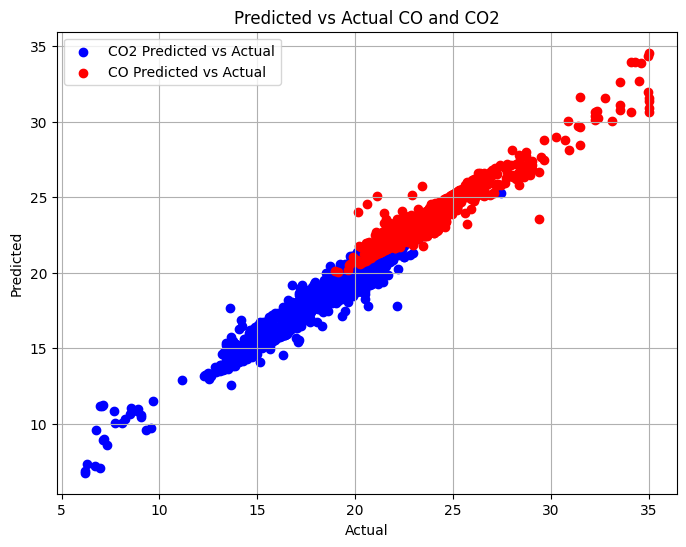

In [ ]:
import matplotlib.pyplot as plt

# Assuming predicted_df_shift_1 contains your predicted data
# Extract the predicted and actual values for CO and CO2
predicted_CO = predicted_df_shift_1['CO']
predicted_CO2 = predicted_df_shift_1['CO2']
actual_CO = y['CO']  # Use the entire y dataset instead of y_test
actual_CO2 = y['CO2']  # Use the entire y dataset instead of y_test

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_CO2, predicted_CO2, color='blue', label='CO2 Predicted vs Actual')
plt.scatter(actual_CO, predicted_CO, color='red', label='CO Predicted vs Actual')
plt.title('Predicted vs Actual CO and CO2')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


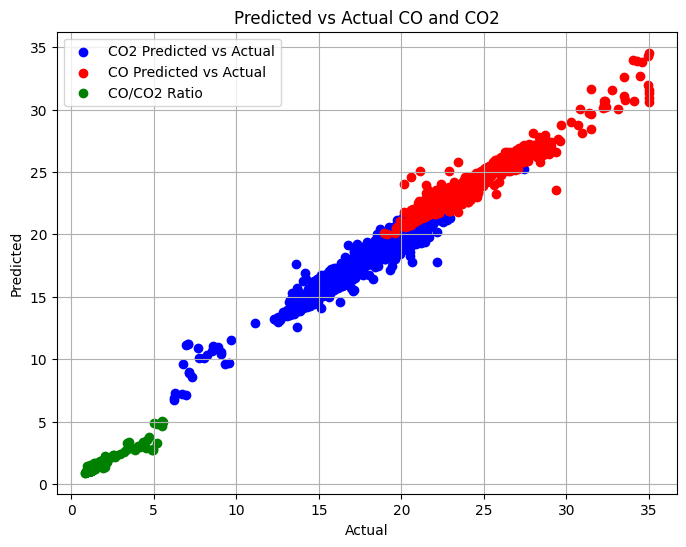

In [ ]:
import matplotlib.pyplot as plt

# Assuming predicted_df_shift_1 contains your predicted data
# Extract the predicted and actual values for CO and CO2
predicted_CO = predicted_df_shift_1['CO']
predicted_CO2 = predicted_df_shift_1['CO2']
actual_CO = y['CO']  # Use the entire y dataset instead of y_test
actual_CO2 = y['CO2']  # Use the entire y dataset instead of y_test

# Calculate CO/CO2 ratios for both actual and predicted values
actual_CO_CO2_ratio = actual_CO / actual_CO2
predicted_CO_CO2_ratio = predicted_CO / predicted_CO2

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_CO2, predicted_CO2, color='blue', label='CO2 Predicted vs Actual')
plt.scatter(actual_CO, predicted_CO, color='red', label='CO Predicted vs Actual')
plt.scatter(actual_CO_CO2_ratio, predicted_CO_CO2_ratio, color='green', label='CO/CO2 Ratio')
plt.title('Predicted vs Actual CO and CO2')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


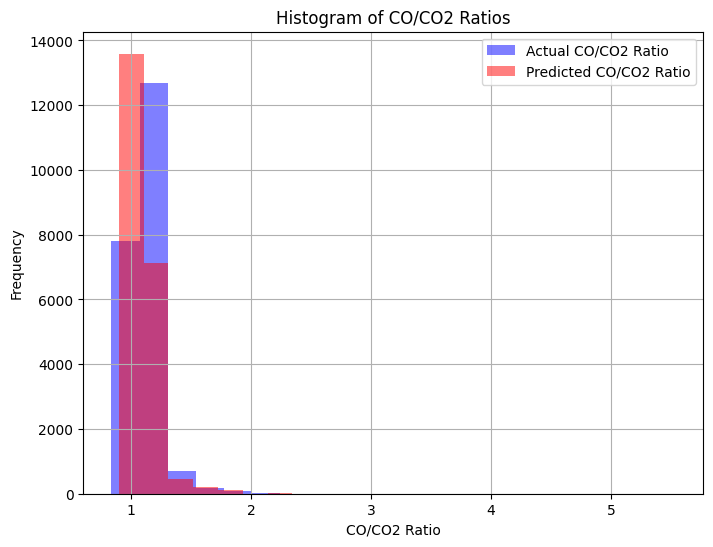

In [ ]:
import matplotlib.pyplot as plt

# Assuming predicted_df_shift_1 contains your predicted data
# Extract the predicted and actual values for CO and CO2
predicted_CO = predicted_df_shift_1['CO']
predicted_CO2 = predicted_df_shift_1['CO2']
actual_CO = y['CO']  # Use the entire y dataset instead of y_test
actual_CO2 = y['CO2']  # Use the entire y dataset instead of y_test

# Calculate CO/CO2 ratios for both actual and predicted values
actual_CO_CO2_ratio = actual_CO / actual_CO2
predicted_CO_CO2_ratio = predicted_CO / predicted_CO2

# Create a histogram for CO/CO2 ratios
plt.figure(figsize=(8, 6))
plt.hist(actual_CO_CO2_ratio, bins=20, color='blue', alpha=0.5, label='Actual CO/CO2 Ratio')
plt.hist(predicted_CO_CO2_ratio, bins=20, color='red', alpha=0.5, label='Predicted CO/CO2 Ratio')
plt.title('Histogram of CO/CO2 Ratios')
plt.xlabel('CO/CO2 Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
